In [146]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
#find current directory
import os
import re
os.getcwd()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Agam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Agam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Agam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'c:\\Users\\Agam\\Documents\\Programming\\Repos\\Deep-Learning-Alexander\\Exercises'

In [147]:
%pwd

'c:\\Users\\Agam\\Documents\\Programming\\Repos\\Deep-Learning-Alexander\\Exercises'

# Read data

In [148]:
# find the directory we are running the cell from:


train_df = pd.read_csv('../lab/data/imdb_train_data_small.csv')
#test_df = pd.read_csv('../lab/data/imdb_test_data_small.csv')


In [149]:
train_df.head()

#train_df.shape

#train_df['label'].value_counts()

,text,label
0,I rated this a 3. The dubbing was as bad as I ...,0
1,"<br /><br />Cheap-looking and ugly, this film ...",0
2,This film concerns purportedly non-establishme...,0
3,Ho-hum. An inventor's(Horst Buchholz)deadly bi...,0
4,"Definitely not worth the rental, but if you ca...",0


# Tokenization

Create your own tokenization algorithm. Remember to handle upper/lower case, comma, punctioation and so on.
Each word should hava an integer connected to it. Word as key and integer as value in a dict is one way to do it.

Tensorflow have tokenization models, but try to bild it yourself.

In [150]:
def tokenize(dataset):
    
    token_map = {'<UNK>': 0}
    reverse_token_map = {0: '<UNK>'}
    current_index = 1

    # Function to clean and split text into words.
    def preprocess(text):
        text = text.lower()
        text = re.sub(r"[^\w\s]+", " ", text)
        return text.split()

    # Iterate over the rows of the dataset and split the text into words.
    for index, row in dataset.iterrows():
        words = preprocess(row['text'])
        for word in words:
            if word not in token_map:
                token_map[word] = current_index
                reverse_token_map[current_index] = word
                current_index += 1

    return token_map, reverse_token_map

In [151]:
# Example usage
dataset = pd.DataFrame({'text': ['This is a test.', 'This is another test.']})
token_map, reverse_token_map = tokenize(dataset)
print(token_map)
print(reverse_token_map)

{'<UNK>': 0, 'this': 1, 'is': 2, 'a': 3, 'test': 4, 'another': 5}
{0: '<UNK>', 1: 'this', 2: 'is', 3: 'a', 4: 'test', 5: 'another'}


# Remove stopwords

In [152]:
stop_words = set(stopwords.words('english'))

In [153]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [154]:
def remove_stopwords(text):
    # Your code
    words = text.split()
    #Remove stop words
    filtered_words = [word for word in words if word not in stop_words]
    #Rejoin words
    filtered_text = ' '.join(filtered_words)

    return filtered_text
text = 'This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".'
filtered_text = remove_stopwords(text)
print(type(filtered_text))
print(filtered_text)
print(len(filtered_text), len(text))

<class 'str'>
This dataset 25,000 movies reviews IMDB, labeled sentiment (positive/negative). Reviews preprocessed, review encoded list word indexes (integers). For convenience, words indexed overall frequency dataset, instance integer "3" encodes 3rd frequent word data. This allows quick filtering operations as: "only consider top 10,000 common words, eliminate top 20 common words".
372 495


# Lemmatization

In [155]:
lemmatizer = WordNetLemmatizer()

In [156]:


# Instantiate the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    pos = tag_dict.get(tag, wordnet.NOUN)
    #print(f"Word: {word}, POS Tag: {pos}")  # Debugging line
    return pos

def lemmatize(word):
    word = word.lower()
    # Lemmatize the word with the appropriate POS tag
    lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    #print(f"Original: {word}, Lemmatized: {lemma}")  # Debugging line
    return lemma

# Example usage
lemmatized_word = lemmatize('Horses')
# should be 'Horse'

# Word embedding and sentiment analysis model
We want to create a model that can say if a movie review is bad or good.

- Preprocess the text
- Convert text to seqiuence of integers
- Create architecture that includes embeddings
- Build and train your models
- Evaluate preformance

Building models from scratch is not something you usually do, but those who would like to dig deeper into the math behind Simple RNN, LSTM and GRU can do it by creating the cells from scratch.

In [157]:

def pad_data(embedded_text, token_map, max_length):
    # All sentences should be of the same lenght, but if a sentence is shorter than the longest, pad it.
    # Lowercase, remove stop words, lemmatize
    words = embedded_text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatize(word) for word in filtered_words]

    # Convert words to integers
    integer_sequence = [token_map.get(word, token_map['<UNK>']) for word in lemmatized_words]

    # Pad the sequence
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences([integer_sequence], maxlen=max_length, padding='post')

    return padded_sequence[0]

# Example usage
text = "Your example text goes here"
token_map = {"example": 1, "text": 2, "<UNK>": 0}  # Define your token_map here
max_length = 20  # Define the maximum length of sequences
padded_text = pad_data(text, token_map, max_length)
print(padded_text)


[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## RNN with tensorflow modules
[Simple RNN cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)

[Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [158]:
def build_rnn_model():
    inputs = np.random.random([32, 10, 8]).astype(np.float32)
    simple_rnn = tf.keras.layers.SimpleRNN(4)
    output = simple_rnn(inputs)

    simple_rnn = tf.keras.layers.SimpleRNN(
        4, return_sequences=True, return_state=True)
    whole_seq_output, final_state = simple_rnn(inputs)

    print(output.shape)
    print(whole_seq_output.shape)
    print(final_state.shape)

    model = Sequential()
    model.add(Embedding(1000, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

## RNN from scratch

In [159]:
class RNNCell(tf.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.Wxh = tf.Variable(tf.random.normal([input_dim, hidden_dim])) # Weight matrix for the input vector x
        self.Whh = tf.Variable(tf.random.normal([hidden_dim, hidden_dim]))# weight matrix for the hidden state h
        self.bh = tf.Variable(tf.zeros([hidden_dim])) # bias vector

    def __call__(self, x, h):
        h_next = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        return h_next

In [160]:
# RNN Model Class
class MyRNNModel(tf.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim=1, sequence_length=20):
        super().__init__()
        self.sequence_length = sequence_length
        self.embedding = Embedding(vocab_size, embedding_dim) # Embedding layer
        self.rnn_cell = RNNCell(embedding_dim, hidden_dim) # RNN cell
        self.Why = tf.Variable(tf.random.normal([hidden_dim, output_dim])) # Weight matrix to map the hidden state to the output dimension
        self.by = tf.Variable(tf.zeros([output_dim]))


    def __call__(self, x):
        x = self.embedding(x)
        h = tf.zeros([x.shape[0], self.rnn_cell.Whh.shape[0]])

        # Process the input sequence
        for t in range(self.sequence_length):
            x_t = x[:, t, :]
            h = self.rnn_cell(x_t, h)

        y = tf.matmul(h, self.Why) + self.by
        return tf.sigmoid(y)

In [161]:
def train_step(model, inputs, targets):
    loss_function = tf.keras.losses.BinaryCrossentropy()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    clip_norm = 1.0
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(targets, predictions)
        # Calculate gradients
        gradients = tape.gradient(loss, model.trainable_variables)

    # Apply gradient clipping
    clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm)
    optimizer.apply_gradients(zip(clipped_gradients, model.trainable_variables))

    return loss


Epoch 1/5, Loss: 2.5289, Accuracy: 0.5729
Epoch 2/5, Loss: 3.6321, Accuracy: 0.5728
Epoch 3/5, Loss: 3.2666, Accuracy: 0.5376
Epoch 4/5, Loss: 1.4073, Accuracy: 0.5493
Epoch 5/5, Loss: 1.7778, Accuracy: 0.5880


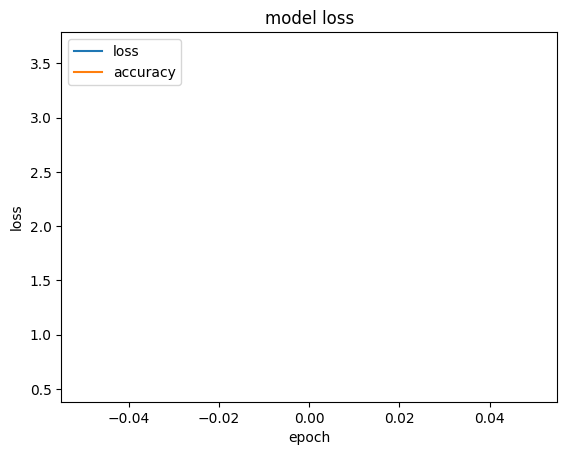

In [162]:
import matplotlib.pyplot as plt
padded_train_data = np.array([pad_data(text, token_map, max_length) for text in train_df['text']])
batch_size = 32
NUM_EPOCHS = 5
model = MyRNNModel(len(token_map), 32, 32)
calculate_accuracy = tf.keras.metrics.BinaryAccuracy()
y = train_df['label'].values

train_dataset = tf.data.Dataset.from_tensor_slices((padded_train_data, y)).batch(batch_size)
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    epoch_accuracy = 0
    total_batches = 0

    for batch_inputs, batch_targets in train_dataset:
        loss = train_step(model, batch_inputs, batch_targets)
        epoch_loss += loss.numpy()

        # Calculate accuracy
        predictions = model(batch_inputs)
        accuracy = calculate_accuracy(batch_targets, predictions)
        epoch_accuracy += accuracy.numpy()

        total_batches += 1

    avg_loss = epoch_loss / total_batches
    avg_accuracy = epoch_accuracy / total_batches
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')



## LSTM

[LSTM Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTMCell)

In [163]:
def build_lstm_model():
    return model

## LSTM from scrtch

In [164]:
# LSTM Cell Class
class LSTMCell(tf.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Gates: input, forget, cell, output
        self.Wi =
        self.Wf =
        self.Wc =
        self.Wo =
        self.bi =
        self.bf =
        self.bc =
        self.bo =

    def __call__(self, x, h, c):
        combined = tf.concat([x, h], 1)

        i = 
        f = 
        o = 
        c_ = 

        c_new = 
        h_new =

        return h_new, c_new

SyntaxError: invalid syntax (1194722719.py, line 9)

In [ ]:
# LSTM Model Class
class MyLSTMModel(tf.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding =
        self.lstm_cell = LSTMCell(embedding_dim, hidden_dim)
        self.Why =
        self.by =

    def __call__(self, x):
        x =
        h =
        c =

        for t in range(sequence_length):
            x_t = x[:, t, :]
            h, c = self.lstm_cell(x_t, h, c)

        y =
        return tf.sigmoid(y)

In [ ]:
def train_step(model, inputs, targets):
    clip_norm = 1.0
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(targets, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    clipped_gradients = [tf.clip_by_norm(g, clip_norm) for g in gradients]
    optimizer.apply_gradients(model.trainable_variables)
    return loss

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((padded_train_data, y)).batch(batch_size)
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    epoch_accuracy = 0
    total_batches = 0

    for batch_inputs, batch_targets in train_dataset:
        loss = train_step(model, batch_inputs, batch_targets)
        epoch_loss += loss.numpy()

        # Calculate accuracy
        predictions = model(batch_inputs)
        accuracy = calculate_accuracy(batch_targets, predictions)
        epoch_accuracy += accuracy.numpy()

        total_batches += 1

    avg_loss = epoch_loss / total_batches
    avg_accuracy = epoch_accuracy / total_batches
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')

## GRU
[GRU Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRUCell)

In [ ]:
def build_gru_model():
    return model

## GRU from scratch

In [ ]:
# GRU Cell Class
class GRUCell(tf.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Update gate parameters
        self.Wz =
        self.bz =

        # Reset gate parameters
        self.Wr =
        self.br =

        # Candidate hidden state parameters
        self.Wh =
        self.bh =
        
    def __call__(self, x, h):
        combined = tf.concat([x, h], 1)

        # Update gate
        z =

        # Reset gate
        r =

        # Candidate hidden state
        combined_reset =
        h_candidate =

        # New hidden state
        h_new =

        return h_new

In [ ]:
# GRU Model Class
class MyGRUModel(tf.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding =
        self.gru_cell =
        self.Why =
        self.by =

    def __call__(self, x):
        x =
        h =

        for t in range(sequence_length):
            x_t = x[:, t, :]
            h = self.gru_cell(x_t, h)

        y =
        return tf.sigmoid(y)

In [ ]:
def train_step(model, inputs, targets):
    clip_norm = 1.0
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(targets, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(model.trainable_variables)
    return loss

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((padded_train_data, y)).batch(batch_size)
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    epoch_accuracy = 0
    total_batches = 0

    for batch_inputs, batch_targets in train_dataset:
        loss = train_step(model, batch_inputs, batch_targets)
        epoch_loss += loss.numpy()

        # Calculate accuracy
        predictions = model(batch_inputs)
        accuracy = calculate_accuracy(batch_targets, predictions)
        epoch_accuracy += accuracy.numpy()

        total_batches += 1

    avg_loss = epoch_loss / total_batches
    avg_accuracy = epoch_accuracy / total_batches
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')